In [1]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [12]:
tv_shows.drop_duplicates(subset="Title", keep='first', inplace=True)


In [13]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
#tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = tv_shows['IMDb']*10
tv_shows['IMDb'] = tv_shows['IMDb'].astype('int')

In [14]:
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9500,96,1,0,0,0,1
1,1,Stranger Things,2016,16+,8800,93,1,0,0,0,1
2,2,Money Heist,2017,18+,8400,91,1,0,0,0,1
3,3,Sherlock,2010,16+,9100,78,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8700,97,1,0,0,0,1


In [22]:
tv_shows_long = pd.melt(tv_shows[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']], id_vars=['Title'],
                       var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'], inplace=True)
tv_shows_long.head()

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Money Heist,Netflix
3,Sherlock,Netflix
4,Better Call Saul,Netflix


In [17]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')
tv_shows_combined.drop(columns = ['Unnamed: 0', 'Netflix',
                                 'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

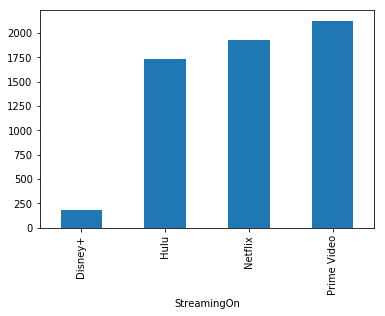

In [19]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [25]:
## Finding the best streaming service.

figure = []
figure.append(px.violin(tv_shows_both_ratings, x='StreamingOn', y='IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x='StreamingOn', y='Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row = i+1, col=j+1)
        
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [26]:
px.scatter(tv_shows_both_ratings, x='IMDb',
          y='Rotten Tomatoes', color='StreamingOn')